In [1]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=a402e7900d704a7b048075f89c00af09f3a3e70ed3b90e57124dad12d1fc46ca
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import warnings
import ta
from ta.trend import SMAIndicator, MACD
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.volume import ChaikinMoneyFlowIndicator
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA

In [235]:
df=pd.read_csv('/content/btc_2h.csv')

In [236]:
df

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13155.38,13203.06,827.053205
1,2018-01-01 07:30:00,13203.00,13611.27,13200.00,13410.03,849.151602
2,2018-01-01 09:30:00,13434.98,13699.00,13322.15,13558.99,745.036375
3,2018-01-01 11:30:00,13539.00,13818.55,13510.00,13570.35,557.178461
4,2018-01-01 13:30:00,13569.98,13735.24,13400.00,13616.99,484.909382
...,...,...,...,...,...,...
17837,2022-01-30 21:30:00,37977.47,38074.76,37751.72,37991.00,1141.092080
17838,2022-01-30 23:30:00,37991.00,38020.39,37442.52,37512.37,2210.156590
17839,2022-01-31 01:30:00,37512.37,37762.60,37351.63,37729.00,1911.983080
17840,2022-01-31 03:30:00,37729.00,38230.00,37625.41,37881.76,2463.470350


In [237]:
MA = df['close'].rolling(window=20).mean()
std = df['close'].rolling(window=20).std()
df['quantile'] = (df['close']-MA)/std
###### EMA #######

fast_ema = df['close'].ewm(span=26, adjust=False).mean()
slow_ema = df['close'].ewm(span=12, adjust=False).mean()

####### MACD #########
macd = fast_ema - slow_ema
signal_line = macd.ewm(span=9, adjust=False).mean()
histogram = macd - signal_line

# Calculate Relative Strength Index (RSI)
df['RSI7'] = RSIIndicator(df['close'], window=7).rsi()
df['RSI14'] = RSIIndicator(df['close'], window=14).rsi()
df['RSI21'] = RSIIndicator(df['close'], window=21).rsi()

# Calculate Chaikin Money Flow (AD line)
df['AD'] = ChaikinMoneyFlowIndicator(df['high'], df['low'], df['close'], df['volume']).chaikin_money_flow()

df['William_Percent_Range'] = ta.momentum.williams_r(df['high'], df['low'], df['close'], lbp=14)

In [238]:
df=df.dropna()
df=df.drop(['open','high','low'],axis=1)

In [239]:
df

,datetime,close,volume,quantile,RSI7,RSI14,RSI21,AD,William_Percent_Range
20,2018-01-02 21:30:00,13780.00,1838.357861,1.529892,63.233777,60.222598,59.317983,0.169701,-10.032668
21,2018-01-02 23:30:00,14732.75,3251.915622,3.328068,81.125185,73.936539,71.386431,0.170639,-28.672290
22,2018-01-03 01:30:00,14692.40,2057.372313,2.488737,79.220409,72.791927,70.456979,0.110505,-30.234142
23,2018-01-03 03:30:00,14675.11,1622.535154,2.043717,78.301324,72.275597,70.046644,0.078317,-30.903397
24,2018-01-03 05:30:00,14820.00,1449.786130,1.957348,80.511776,73.943563,71.506768,0.081109,-25.295049
...,...,...,...,...,...,...,...,...,...
17837,2022-01-30 21:30:00,37991.00,1141.092080,0.281968,51.668626,54.498744,54.513946,0.139355,-50.247194
17838,2022-01-30 23:30:00,37512.37,2210.156590,-1.732826,34.779755,46.450866,49.610159,0.053838,-86.104876
17839,2022-01-31 01:30:00,37729.00,1911.983080,-0.837705,44.379771,50.046413,51.675990,0.120439,-72.436839
17840,2022-01-31 03:30:00,37881.76,2463.470350,-0.184510,50.387600,52.469986,53.099657,0.086099,-61.279225


In [240]:
df = df.set_index('datetime')

# Data Preprocessing

In [241]:
df.describe()

,close,volume,quantile,RSI7,RSI14,RSI21,AD,William_Percent_Range
count,17822.000000,17822.000000,17822.000000,17822.000000,17822.000000,17822.000000,17822.000000,17822.000000
mean,18816.998946,4551.642285,0.073708,51.224559,51.030431,50.939185,0.052692,-46.004355
std,17880.249679,4007.264948,1.308979,16.945383,12.741482,10.762521,0.125801,26.438623
min,3172.050000,5.887034,-4.130499,2.176024,6.232053,10.265989,-0.375349,-100.000000
25%,7132.097500,2242.369542,-0.904410,39.832290,42.563114,43.773819,-0.031810,-68.659806
50%,9523.645000,3446.447869,0.128012,51.395059,51.079121,50.989737,0.050862,-44.509741
75%,32760.582500,5502.626738,1.070820,62.749141,59.420416,57.945789,0.135029,-22.669360
max,68633.690000,75186.338442,4.171500,98.877930,95.817979,92.922607,0.498262,-0.000000


In [242]:
#checking for stationarity using Augumented dicky fuller test
for col in df.columns:
    result = adfuller(df[col])
    p_value = result[1]
    print(f"Column '{col}': p-value = {p_value}")

Column 'close': p-value = 0.8358919215288996
Column 'volume': p-value = 2.837565498845815e-14
Column 'quantile': p-value = 0.0
Column 'RSI7': p-value = 0.0
Column 'RSI14': p-value = 0.0
Column 'RSI21': p-value = 4.2366231842600324e-30
Column 'AD': p-value = 3.263598389437171e-24
Column 'William_Percent_Range': p-value = 0.0


P value for close is significantly higher than 0.05, hence they are not stationary, other varaibles are stationary and hence they don't have statistically significant trend or seasonality

In [243]:
#differencing the columns once to make them stationary
df['close']=df['close'].diff()
df=df.dropna()

In [244]:
#checking for stationarity of differenced data using Augumented dicky fuller test
for col in ['close']:
    result = adfuller(df[col])
    adf_statistic = result[0]
    p_value = result[1]
    print(f"Column '{col}': ADF Statistic = {adf_statistic}, p-value = {p_value}")

Column 'close': ADF Statistic = -20.64753416132383, p-value = 0.0


All cols are stationary now





# Feature selection using causation and correlation analysis

We will do this analysis under the assumption that close can be modelled as a linear function of previous close and feature values. Our hypothesis function,

\begin{equation}
\text{close}(n) = \sum_{i=1}^{m_1} p_{1i} \text{close}(n-i) + \sum_{j=2}^{nfeatures+1} \sum_{k=1}^{m_j} p_{jk} \text{feature}_j(n-k) + \text{constant}
\end{equation}


Causality test:

To check if a feature variable (say dummy1) causes close, We will first build a reduced model, where close is just build using previous close values

\begin{equation}
\text{close}(n) = \sum_{i=1}^{m_1} p_{1i} \text{close}(n-i) + \text{constant}
\end{equation}

Then we will built our full model using close and dummy1

\begin{equation}
\text{close}(n) = \sum_{i=1}^{m_1} p_{1i} \text{close}(n-i) + \sum_{k=1}^{m_2} p_{2k} \text{dummy}_1(n-k) + \text{constant}
\end{equation}


Then we can test for the hypothesis,

\begin{equation}
p_{2k} = 0 \quad \text{for } k = 1, 2, \ldots, m_2, \quad \text{given } p_{1i} \neq 0 \quad \text{for } i = 1, 2, \ldots, m_1
\end{equation}

If this hypothesis turns out to be true, then dummy1 doesn't give us much more information than what is given by previous close values, so dummy 1 can be ignored

We will find the value of $m_1$ (lag value corresponding to close) using PACF plot. We will try out different lag values (2 to 5) for feature variables $m_j$ ($j$ from 2 to n_feature+1),  to determine their appropriate values

In [245]:
df

,close,volume,quantile,RSI7,RSI14,RSI21,AD,William_Percent_Range
datetime,,,,,,,,
2018-01-02 23:30:00,952.75,3251.915622,3.328068,81.125185,73.936539,71.386431,0.170639,-28.672290
2018-01-03 01:30:00,-40.35,2057.372313,2.488737,79.220409,72.791927,70.456979,0.110505,-30.234142
2018-01-03 03:30:00,-17.29,1622.535154,2.043717,78.301324,72.275597,70.046644,0.078317,-30.903397
2018-01-03 05:30:00,144.89,1449.786130,1.957348,80.511776,73.943563,71.506768,0.081109,-25.295049
2018-01-03 07:30:00,-1.51,1854.047460,1.695068,80.412177,73.893668,71.468645,0.038911,-25.353497
...,...,...,...,...,...,...,...,...
2022-01-30 21:30:00,10.91,1141.092080,0.281968,51.668626,54.498744,54.513946,0.139355,-50.247194
2022-01-30 23:30:00,-478.63,2210.156590,-1.732826,34.779755,46.450866,49.610159,0.053838,-86.104876
2022-01-31 01:30:00,216.63,1911.983080,-0.837705,44.379771,50.046413,51.675990,0.120439,-72.436839


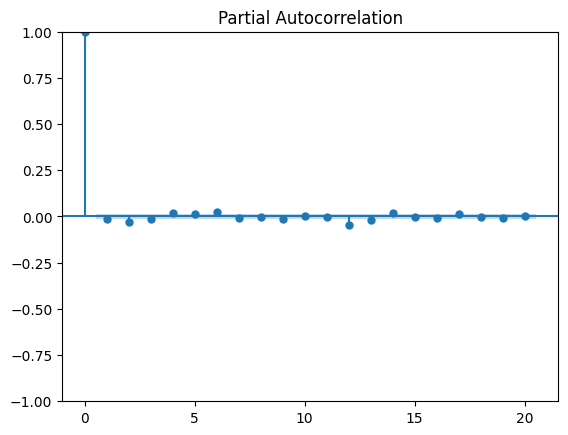

In [246]:
sm.graphics.tsa.plot_pacf(df['close'], lags=20, method="ywm")
plt.show()





Only for 2 lag values the partial correlation value is higher than the threshold, So we will take m1=2

\begin{equation}
\text{Sum-squared-residuals} (SSres)
= \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\
\end{equation}

\begin{equation}
\text{Sum squared regressors} (SSr):
= \sum_{i=1}^{n} (\bar{y} - \hat{y}_i)^2
\
\end{equation}

\begin{align*}
\text{for the hypothesis SSr_h} &= SSr_{fm} - SSr_{rm} \\
f_o &= \frac{\frac{SSr_h}{dof_{SSr_h}}}{\frac{SSres_{fm}}{dof_{SSres_{fm}}}}
\end{align*}



Reduced Model

In [247]:
# this function splits given df into feature and target arrays, based on lag value specified

def to_sequences(seq_size, obs,obs1):
  x = []
  y = []
  for i in range(len(obs)-SEQUENCE_SIZE):
      window = obs[i:(i+SEQUENCE_SIZE)]
      after_window = obs1[i+SEQUENCE_SIZE]
      x.append(window)
      y.append(after_window)

  return np.array(x),np.array(y)

df1=pd.DataFrame()
df1['close']=df['close']
df1_y=df1["close"][:].to_list()

SEQUENCE_SIZE = 2
x_train,y_train = to_sequences(SEQUENCE_SIZE,df1_y,df1_y)

x_train=np.column_stack((np.ones(len(x_train)), x_train))
y_bar=sum(y_train)/len(y_train)
coef=np.linalg.inv(x_train.T@x_train)@x_train.T @y_train

SSr_rm=np.sum((y_bar - x_train.dot(coef)) ** 2)

Full model

In [248]:
#causality test to figure out what all dummy variables and to what lags cause the price
dummy_columns = df.columns[df.columns != 'close']
for col in dummy_columns:
  lag_range = range(1, 6)
  p_values = {}

  df1=pd.DataFrame()
  df1['close']=df['close']
  df1[col]=df[col]
  df1_y=df1["close"][:].to_list()
  df1=df1[col][:].to_list()

  for lag in lag_range:


      def to_sequences(seq_size1, seq_size2, obs,obs1):
        # This function gives us a list of previous 4 day price and signal in x and the current day price in y
        x = []
        y = []
        if seq_size1>=seq_size2:
          for i in range(len(obs)-seq_size1):
              window = obs[i:(i+seq_size1)]
              window1 = obs1[i+(seq_size1-seq_size2):(i+seq_size1)]
              after_window = obs1[i+seq_size1]
              x.append(window1+window)
              y.append(after_window)
        else:
          for i in range(len(obs)-seq_size2):
              window = obs[i+(-1*seq_size1+seq_size2):(i+seq_size2)]
              window1 = obs1[i:(i+seq_size2)]
              after_window = obs1[i+seq_size2]
              x.append(window1+window)
              y.append(after_window)

        return np.array(x),np.array(y)


      SEQUENCE_SIZE1 = lag
      x_train,y_train = to_sequences(SEQUENCE_SIZE1,2,df1,df1_y)
      # print("Shape of training set: {}".format(x_train.shape))
      # print("Shape of training set: {}".format(y_train.shape))

      x_train=np.column_stack((np.ones(len(x_train)), x_train))


      y_bar=sum(y_train)/len(y_train)
      coef=np.linalg.inv(x_train.T@x_train)@x_train.T @y_train

      # Calculate the F-statistic and corresponding p-value
      dof_SSr_h = lag
      dof_SSres_fm = len(y_train) - lag - 3 # Total degrees of freedom
      SSr_fm=np.sum((y_bar - x_train.dot(coef)) ** 2)
      SSh=SSr_fm-SSr_rm
      f_statistic = (SSh / dof_SSr_h) / (np.sum((y_train - x_train.dot(coef)) ** 2) / dof_SSres_fm)
      p_value = 1-stats.f.cdf(f_statistic, dof_SSr_h, dof_SSres_fm)


      # Store the p-value for this lag
      p_values[lag]=p_value




  print(col,p_values)





volume {1: 0.0037183604224249045, 2: 0.010355988407194094, 3: 0.0019345432325407197, 4: 0.002448555987667911, 5: 0.005605021336033911}
quantile {1: 0.008700879832387987, 2: 0.02066489406610139, 3: 0.0018623628498254385, 4: 0.004717066720377638, 5: 0.009306086489598298}
RSI7 {1: 0.07186472946015121, 2: 0.12431503514511344, 3: 0.046130837441080486, 4: 0.071684030050719, 5: 0.11437768123029046}
RSI14 {1: 0.08968208396539434, 2: 0.21101963887732011, 3: 0.0216636785694595, 4: 0.04482238672272976, 5: 0.05922357237655895}
RSI21 {1: 0.11436670525273018, 2: 0.2626005165558529, 3: 0.015183089622594736, 4: 0.03297257520708585, 5: 0.039792801324914695}
AD {1: 0.9896008863523958, 2: 0.6786083181982643, 3: 0.2238476542843193, 4: 0.14100426443455438, 5: 0.1925170025652312}
William_Percent_Range {1: 0.24902153349600398, 2: 0.488053731934731, 3: 0.012779685587009815, 4: 0.027723288874059837, 5: 0.05320425730375555}


Except AD, others are significant at lag value of 3, so we skip AD and use others till a lag of 3

Correlation analysis between dummy features

In [249]:
df=df.drop(['AD'],axis=1)

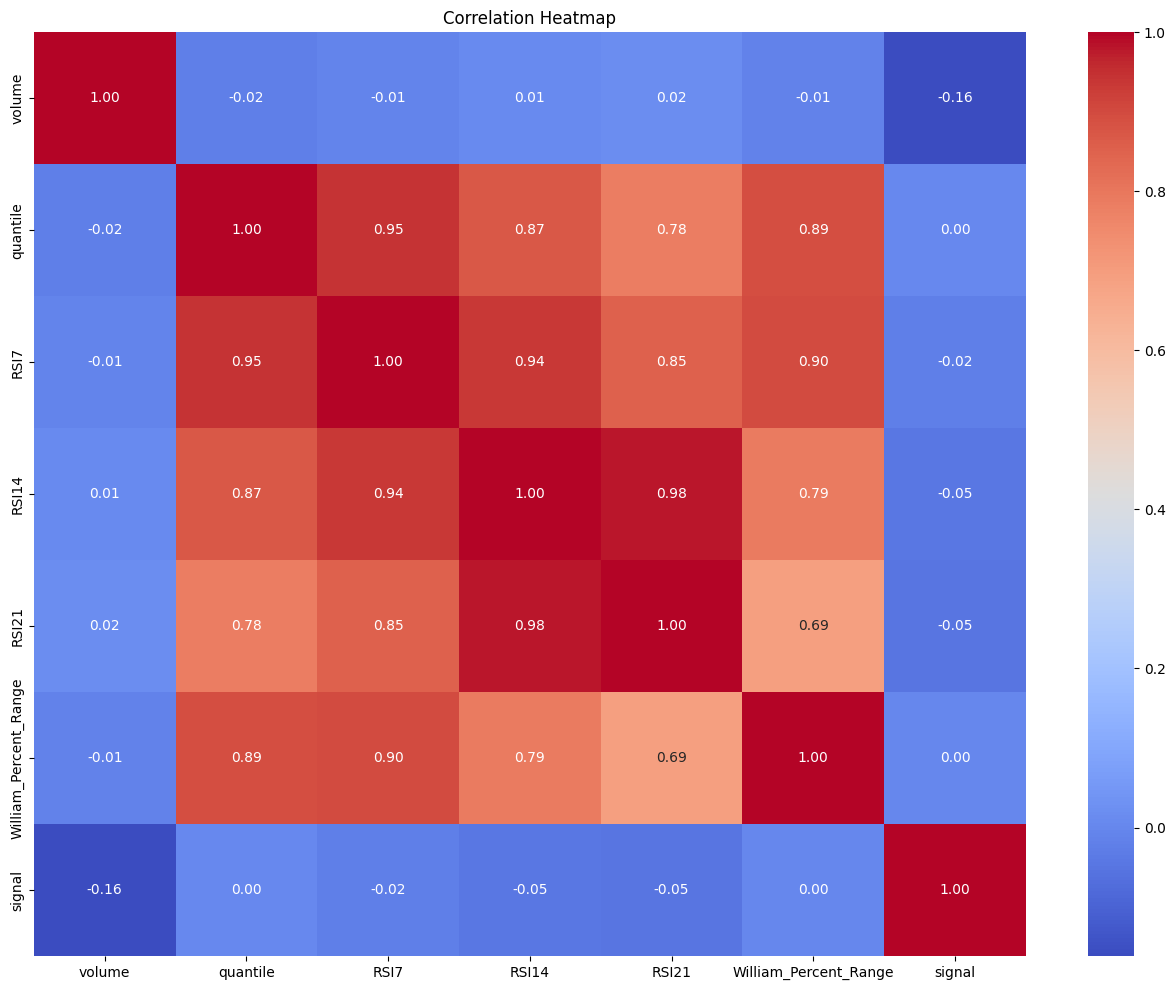

In [284]:
corr_matrix = df.drop(['close'],axis=1).corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Features are internally correlated and can cause issues with linear regression, So we apply PCA to make the features uncorrelated

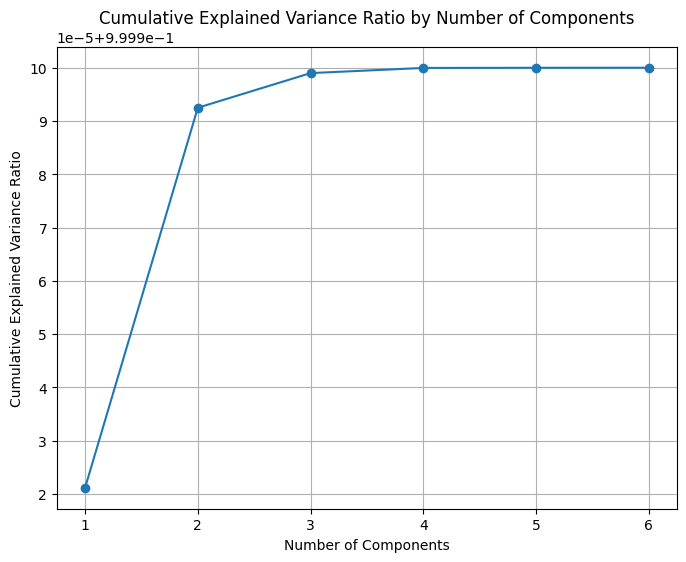

In [250]:
# using inbuilt PCA function to find appropriate no of principle components
pca = PCA()
X=df.drop(["close"],axis=1)
X_pca = pca.fit_transform(X)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

4 components explain all variance in data

In [251]:
X=df.drop(["close"],axis=1)

cov_matrix = (X - X.mean()).cov()
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

k = 4
selected_eigenvalues = eigenvalues[:k]
selected_eigenvectors = eigenvectors[:, :k]

X_pca = (X - X.mean()).dot(selected_eigenvectors)
df_full = pd.concat([X_pca, df['close']], axis=1)

# Model and residual analysis

Model:

We split the data into train and test set, We solve the alreday proposed hypothesis using OLS

In [252]:
train=df_full.values.tolist()
trainy=df_full['close'].values.tolist()

In [253]:
def to_sequences(seq_size, obs,obs1):
    # This function gives us a list of previous 2 lagged close and dummy variables in x and the current close in y
    x = []
    y = []
    for i in range(len(obs)-SEQUENCE_SIZE):
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs1[i+SEQUENCE_SIZE]
        x.append(window)
        y.append(after_window)

    return np.array(x),np.array(y)


SEQUENCE_SIZE = 3
x_train,y_train = to_sequences(SEQUENCE_SIZE,train,trainy)
print("Shape of training set: {}".format(x_train.shape))
print("Shape of training set: {}".format(y_train.shape))

Shape of training set: (17818, 3, 5)
Shape of training set: (17818,)


In [254]:
# reshaping into a 2d array to make it suitable for least square optimisation
x_train = np.reshape(x_train, (17818, 15))
y_train = np.reshape(y_train, (17818))

In [255]:
#least square optimisation using normal equation
x_train=np.column_stack((np.ones(len(x_train)), x_train))
weights=np.linalg.inv(x_train.T@x_train)@x_train.T @y_train
pred_train=x_train @ weights
residual_train=pred_train-y_train

In [257]:
np.mean(y_train)

1.2428970703782694

In [258]:
np.std(y_train)

309.2204227254589

In [259]:
pred_train = [0 if 5 <= val <= 150 else 1 if -150 <= val <= -5 else 2 for val in pred_train]

In [260]:
df = df.iloc[3:]
df['signal']=pred_train

In [395]:
df

,close,volume,quantile,RSI7,RSI14,RSI21,William_Percent_Range,signal
datetime,,,,,,,,
2018-01-03 05:30:00,144.89,1449.786130,1.957348,80.511776,73.943563,71.506768,-25.295049,2
2018-01-03 07:30:00,-1.51,1854.047460,1.695068,80.412177,73.893668,71.468645,-25.353497,0
2018-01-03 09:30:00,169.51,1641.404519,1.716438,83.143256,75.862674,73.155593,-18.792167,0
2018-01-03 11:30:00,182.00,1570.297548,1.724522,85.649573,77.798820,74.833138,-11.747379,0
2018-01-03 13:30:00,-650.01,2137.839534,0.733322,52.885669,59.455619,60.625724,-39.206576,0
...,...,...,...,...,...,...,...,...
2022-01-30 21:30:00,10.91,1141.092080,0.281968,51.668626,54.498744,54.513946,-50.247194,2
2022-01-30 23:30:00,-478.63,2210.156590,-1.732826,34.779755,46.450866,49.610159,-86.104876,2
2022-01-31 01:30:00,216.63,1911.983080,-0.837705,44.379771,50.046413,51.675990,-72.436839,0


In [396]:
buy_signal = None
buy_datetime = None
sell_datetime = None
trades = []

# Iterate through the DataFrame
for index, row in df.iterrows():
    if row['signal'] == 0 and buy_signal is None:
        # Record buy event
        buy_signal = 1
        buy_datetime = df.index[df.index.get_loc(index) - 1]
    elif row['signal'] == 1 and buy_signal == 1:
        # Record sell event
        buy_signal = None
        sell_datetime = df.index[df.index.get_loc(index) - 1]
        trades.append({'Buy': buy_datetime, 'Sell': sell_datetime})

# Convert the list of trades to a DataFrame
trades_df = pd.DataFrame(trades)

In [397]:
trades_df

,Buy,Sell
0,2018-01-03 05:30:00,2018-01-03 19:30:00
1,2018-01-06 01:30:00,2018-01-06 15:30:00
2,2018-01-08 13:30:00,2018-01-08 23:30:00
3,2018-01-10 05:30:00,2018-01-10 17:30:00
4,2018-01-11 07:30:00,2018-01-11 13:30:00
...,...,...
1863,2022-01-26 13:30:00,2022-01-26 15:30:00
1864,2022-01-26 21:30:00,2022-01-27 11:30:00
1865,2022-01-27 19:30:00,2022-01-28 05:30:00
1866,2022-01-28 13:30:00,2022-01-28 19:30:00


In [398]:
df_or=pd.read_csv('/content/btc_2h.csv')
df_or['price']=df_or.open.shift(-1)
df_or = df_or.sort_values(by='datetime')

# Create a dictionary from 'datetime' and 'close' columns
close_dict = dict(zip(df_or['datetime'], df_or['price']))

# Print or use the resulting dictionary 'close_dict'
print(close_dict)

{'2018-01-01 05:30:00': 13203.0, '2018-01-01 07:30:00': 13434.98, '2018-01-01 09:30:00': 13539.0, '2018-01-01 11:30:00': 13569.98, '2018-01-01 13:30:00': 13632.0, '2018-01-01 15:30:00': 13220.56, '2018-01-01 17:30:00': 12999.71, '2018-01-01 19:30:00': 13247.0, '2018-01-01 21:30:00': 13007.87, '2018-01-01 23:30:00': 13222.03, '2018-01-02 01:30:00': 13494.99, '2018-01-02 03:30:00': 13382.16, '2018-01-02 05:30:00': 13611.93, '2018-01-02 07:30:00': 13353.78, '2018-01-02 09:30:00': 13166.95, '2018-01-02 11:30:00': 13343.01, '2018-01-02 13:30:00': 13460.0, '2018-01-02 15:30:00': 13490.0, '2018-01-02 17:30:00': 13864.95, '2018-01-02 19:30:00': 13690.02, '2018-01-02 21:30:00': 13789.98, '2018-01-02 23:30:00': 14710.02, '2018-01-03 01:30:00': 14700.0, '2018-01-03 03:30:00': 14690.0, '2018-01-03 05:30:00': 14847.97, '2018-01-03 07:30:00': 14805.81, '2018-01-03 09:30:00': 14980.89, '2018-01-03 11:30:00': 15170.0, '2018-01-03 13:30:00': 14501.05, '2018-01-03 15:30:00': 14764.73, '2018-01-03 17:30:

In [399]:
c=1000
c_=[]
t=[]
k=0
profitable=[]
loss=[]
for i,r in trades_df.iterrows():
    if close_dict[r['Sell']]>close_dict[r['Buy']]:
      profitable.append({'Buy':close_dict[r['Buy']],'Sell':close_dict[r['Sell']] })
    else:
      loss.append({'Buy':close_dict[r['Buy']],'Sell':close_dict[r['Sell']] })
    s=c/close_dict[r['Buy']]
    p=close_dict[r['Sell']]
    # if close_dict[r['Sell']]<0.9*close_dict[r['Buy']]:
    #   k+=1
    #   for timestamp, price in close_dict.items():
    #     if r['Buy'] <= timestamp <= r['Sell']:
    #         if price < 0.91*close_dict[r['Buy']]:
    #           p=price
    #           t.append(p-close_dict[r['Sell']])
    #           break
    c+=s*(p-close_dict[r['Buy']])
    print(p,close_dict[r['Buy']],c)
    c_.append(c)

15045.0 14847.97 1013.269827457895
16505.16 16799.94 995.4904973092137
15196.56 14650.0 1032.6301072893723
13813.1 14120.0 1010.1857602690388
13425.25 12911.92 1050.3469954934599
13496.99 13722.04 1033.1206507709694
13717.0 13520.06 1048.1696062462288
14210.0 14318.0 1040.2633122474444
13280.22 13590.0 1016.5508200570093
14067.03 13532.0 1056.7433403980604
13055.0 12973.76 1063.3605299386359
11286.97 10900.02 1101.1097594868158
10415.99 10898.21 1052.3882585963272
10777.93 10534.04 1076.7537415818729
10366.0 9850.76 1133.0729086118934
11377.78 10972.59 1174.9144256867548
11413.78 10461.71 1281.8377467560247
11324.99 11535.0 1258.5001875712624
11474.98 11141.1 1296.215318269873
12850.0 12320.05 1351.9723410025015
12194.18 12508.96 1317.9508193491613
11381.01 11311.45 1326.0555856694764
10507.01 11240.0 1239.5800088242922
10998.93 10250.85 1330.041288913385
10955.99 10557.63 1380.2263444468274
11242.98 11465.91 1353.3908068429623
10549.09 11280.0 1265.6951619289916
11452.62 11018.0 1315.

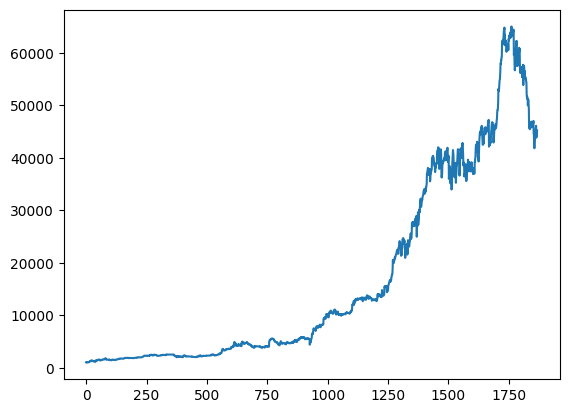

In [400]:
plt.plot(c_)

In [401]:
t

[]

In [402]:
len(profitable)/len(trades)

0.5610278372591007

In [403]:
Gross_profit=0
largest_win=0
trade=[]
for i in profitable:
  largest_win=max(largest_win,i['Sell']-i['Buy'])
  trade.append(i['Sell']-i['Buy'])
  Gross_profit+=(i['Sell']-i['Buy'])

In [404]:
avg_win=Gross_profit/len(profitable)

In [405]:
avg_win

325.84044847328244

In [406]:
Net_profit=c_[-1]-c_[0]

In [407]:
Total_trades=len(trades)

In [408]:
Gross_loss=0
largest_loss=1e7
for i in loss:
  largest_loss=min(largest_loss,i['Sell']-i['Buy'])
  trade.append(i['Sell']-i['Buy'])
  Gross_loss+=(i['Sell']-i['Buy'])

In [409]:
avg_loss=Gross_loss/len(loss)

In [410]:
avg_loss

-341.92239024390227

In [411]:
bnh=(1000/13203.06)*(36821.05	-13203.06)

In [412]:
bnh

1788.826984047638

In [413]:
sharpe=np.mean(trade)/np.std(trade)

In [414]:
def calculate_sortino_ratio(returns):
    average_return = np.mean(returns)
    downside_returns = [r for r in returns if r < 0]
    downside_deviation = np.std(downside_returns) if len(downside_returns) > 0 else 0

    sortino_ratio = average_return / downside_deviation if downside_deviation > 0 else 0
    return sortino_ratio

In [415]:
sortino=calculate_sortino_ratio(trade)

In [416]:
trades_df['Buy'] = pd.to_datetime(trades_df['Buy'])
trades_df['Sell'] = pd.to_datetime(trades_df['Sell'])

# Calculate the holding period for each trade
trades_df['holding_period'] = trades_df['Sell'] - trades_df['Buy']

# Calculate the average holding period
avg_holding_period = trades_df['holding_period'].mean()


In [417]:
import numpy as np

# Assuming 'portfolio_values' is your list of portfolio values
portfolio_values=c_

running_max = np.maximum.accumulate(portfolio_values)
drawdown = (portfolio_values - running_max) / running_max

print(f'Maximum Drawdown: {np.min(drawdown):.2%}')


Maximum Drawdown: -35.69%


In [418]:
Gross_profit

341480.79

In [419]:
Net_profit

44184.44788326284

In [420]:
Gross_loss

-280376.35999999987

In [421]:
Total_trades

1868

In [422]:
sortino

0.046150216692473656

In [423]:
largest_win

3367.980000000003

In [424]:
largest_loss

-6216.990000000005

In [425]:
avg_holding_period

Timedelta('0 days 09:07:19.400428265')